In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from utils import read_missing
from exp_max import expectation_max, gaussian_linspace

Ground Truth:
[[ 6.50107336  0.21845727]
 [ 9.83389366  2.39788582]
 [13.29799308  0.37456007]]
Estimates:
[[ 6.49032048  0.14071406]
 [ 9.81958884  2.95121588]
 [13.33434422  0.24335803]]
Difference:
[[-0.01075288 -0.07774321]
 [-0.01430482  0.55333005]
 [ 0.03635114 -0.13120204]]


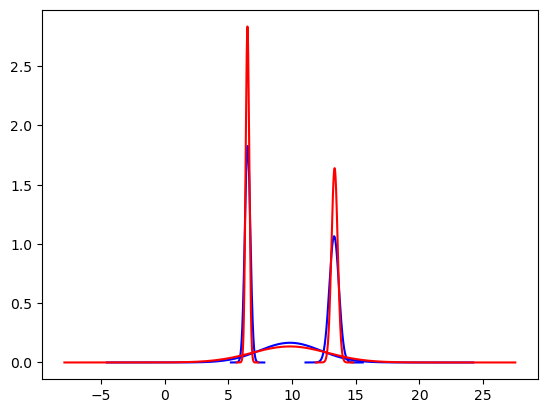

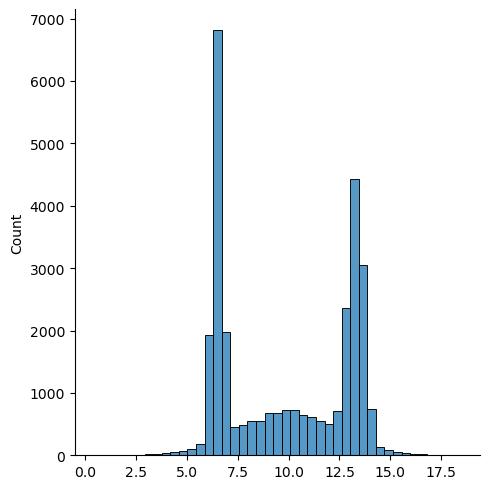

In [2]:
rng = np.random.default_rng()
sample_size = 10_000
num_hidden = 3
true_means = rng.uniform(low=-10,high=5) + np.cumsum(rng.uniform(low=1, high=4, size=num_hidden))
true_stds = rng.uniform(low=0.02,high=3, size=num_hidden)
test_data = np.concatenate([rng.normal(m,s,sample_size) for m, s in zip(true_means, true_stds)])

estimates = expectation_max(test_data, len(true_means))
ground_truth = np.array(list(zip(true_means, true_stds)))
print("Ground Truth:\n{}".format(ground_truth))
print("Estimates:\n{}".format(estimates))
print("Difference:\n{}".format(estimates-ground_truth))

for mean, std in ground_truth:
    window = gaussian_linspace(mean, std)
    plt.plot(window[0], window[1], c='b')
for mean, std in estimates:
    window = gaussian_linspace(mean, std)
    plt.plot(window[0], window[1], c='r')
sns.displot(test_data)

In [33]:
df = read_missing("../Project/missing/MissingData1.txt").T
df

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,241
0,-0.11,-0.30,0.50,0.00,0.40,0.39,0.50,-0.52,-0.87,-1.39,...,0.19,0.38,-0.06,0.12,-0.03,-0.45,0.12,1.31,0.34,-0.03
1,0.02,-0.37,0.18,-0.11,-0.16,-0.18,-0.24,-0.48,-0.17,-0.57,...,-0.27,0.10,-0.06,-0.18,0.36,-0.31,-0.27,0.05,0.03,-0.03
2,-0.36,-0.18,0.41,NaN,0.31,-0.09,-0.16,-0.73,0.10,-0.16,...,-0.43,0.22,0.12,-0.08,-0.04,-0.26,0.03,-0.17,-0.12,-0.22
3,-0.11,-0.09,NaN,0.19,-0.34,-0.04,NaN,-0.42,-0.12,-0.02,...,-0.12,0.08,0.34,-0.18,0.41,-0.74,0.36,0.23,-0.03,0.06
4,0.48,-0.16,NaN,0.00,0.02,-0.25,0.04,-0.40,NaN,0.30,...,-0.07,0.13,0.07,0.10,0.15,-0.06,1.09,-0.25,0.33,-0.03
5,-0.20,-0.16,0.15,-0.07,0.21,-0.69,NaN,-0.01,0.52,0.41,...,0.21,0.30,-0.06,0.08,0.04,0.09,0.41,-0.76,-0.23,-0.31
6,0.27,-0.10,-0.25,0.18,-0.70,-0.64,-0.11,-0.34,-0.28,0.03,...,-0.01,-0.12,-0.12,0.15,-0.41,-0.37,0.15,-0.06,-0.08,0.01
7,0.29,-0.09,-0.41,0.18,0.11,-0.38,0.10,0.55,0.50,0.50,...,0.24,0.06,0.08,0.15,0.19,0.38,0.01,-0.22,0.20,0.22
8,-0.34,0.46,-0.07,-0.23,0.08,0.41,-0.04,NaN,0.09,0.48,...,0.04,-0.16,-0.07,0.05,-0.45,0.35,-0.22,0.36,-0.08,0.46
9,-0.05,0.32,-0.13,-0.16,0.05,0.33,-0.01,0.37,-0.01,0.51,...,0.01,NaN,0.04,-0.31,-0.01,0.45,-0.01,-0.17,0.08,0.24


In [38]:
print("num features with missing", len(df.isna().sum().where(lambda x: x>0).dropna()), "/",len(df.T))
print("How many missing per feature", *[(i,a) for i,a in pd.DataFrame(df.isna().sum().where(lambda x: x>0).dropna()).itertuples()],sep="\n")

num features with missing 94 / 242
How many missing per feature
(2, 2.0)
(3, 1.0)
(6, 2.0)
(7, 1.0)
(8, 1.0)
(10, 1.0)
(13, 1.0)
(15, 1.0)
(19, 1.0)
(20, 1.0)
(26, 1.0)
(27, 1.0)
(32, 2.0)
(34, 1.0)
(39, 2.0)
(42, 1.0)
(45, 1.0)
(46, 1.0)
(48, 1.0)
(50, 2.0)
(51, 1.0)
(53, 1.0)
(56, 2.0)
(57, 1.0)
(63, 1.0)
(67, 1.0)
(68, 1.0)
(72, 2.0)
(74, 1.0)
(75, 1.0)
(78, 1.0)
(82, 1.0)
(83, 1.0)
(85, 1.0)
(87, 1.0)
(88, 1.0)
(91, 1.0)
(98, 1.0)
(99, 1.0)
(102, 2.0)
(105, 1.0)
(107, 1.0)
(108, 2.0)
(118, 1.0)
(121, 1.0)
(125, 1.0)
(126, 2.0)
(129, 1.0)
(130, 1.0)
(134, 1.0)
(136, 1.0)
(142, 2.0)
(143, 2.0)
(144, 2.0)
(148, 1.0)
(149, 2.0)
(150, 2.0)
(153, 1.0)
(154, 1.0)
(155, 1.0)
(156, 1.0)
(157, 1.0)
(159, 1.0)
(162, 1.0)
(163, 1.0)
(165, 3.0)
(167, 1.0)
(168, 2.0)
(172, 1.0)
(175, 1.0)
(177, 1.0)
(178, 2.0)
(182, 1.0)
(183, 1.0)
(186, 1.0)
(187, 1.0)
(188, 1.0)
(189, 1.0)
(191, 1.0)
(200, 1.0)
(201, 1.0)
(205, 1.0)
(207, 2.0)
(208, 1.0)
(210, 1.0)
(212, 1.0)
(214, 2.0)
(217, 1.0)
(218, 1.0)
(

<Axes: >

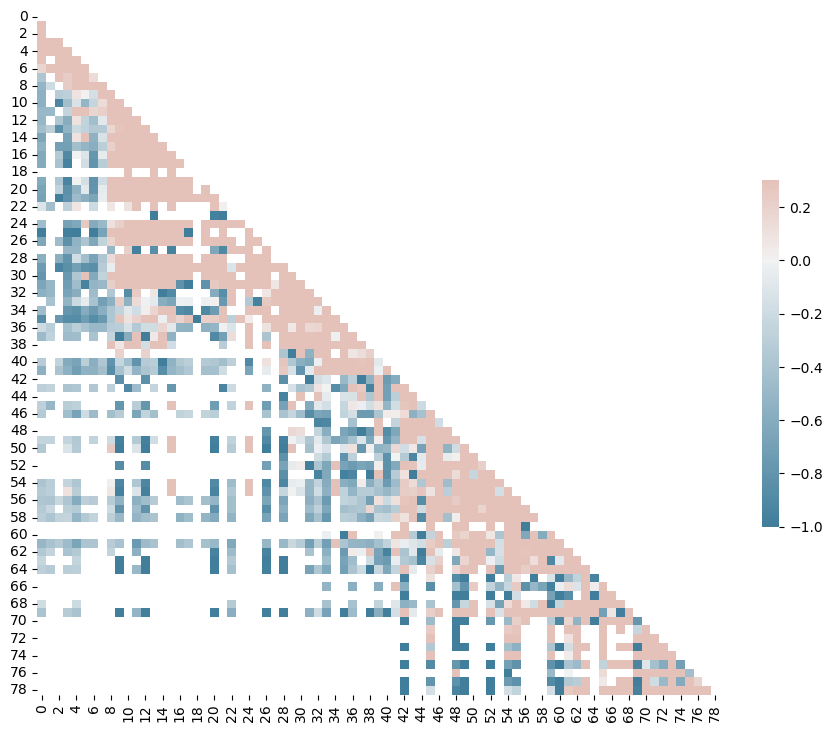

In [18]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, cbar_kws={"shrink": .5})

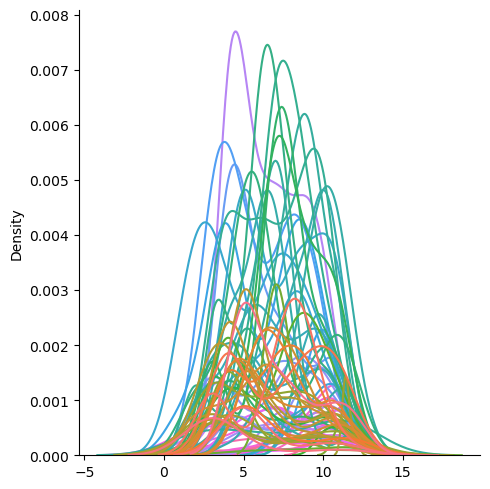

In [19]:
sns.displot(df, kind='kde', legend=False)